# Introduction to Hough Transform

The Hough Transform is a feature extraction technique used in image analysis, computer vision, and digital image processing. It is particularly useful for detecting simple shapes such as lines, circles, and ellipses in an image. The method is robust to noise and partial occlusion, making it a popular choice for shape detection tasks.

## Theory of Hough Transform

The Hough Transform works by transforming the points in the image space into a parameter space, where the desired shapes can be identified as peaks in the transformed space. For example, in the case of line detection:

- A line in the image space can be represented in polar coordinates as:
    $$
    \rho = x \cdot \cos(\theta) + y \cdot \sin(\theta)
    $$
    where:
    - $\rho$ is the perpendicular distance from the origin to the line.
    - $\theta$ is the angle between the x-axis and the perpendicular from the origin to the line.

- Each point in the image space corresponds to a sinusoidal curve in the parameter space $(\rho, \theta)$.
- The intersection of these curves in the parameter space indicates the presence of a line in the image space.

## Types of Hough Transform

1. **Standard Hough Transform**:
     - Detects lines by finding intersections in the $(\rho, \theta)$ parameter space.
     - Suitable for detecting all possible lines in an image.

2. **Probabilistic Hough Transform**:
     - A more efficient version of the Hough Transform.
     - Instead of considering all points, it uses a random subset of points to detect lines.
     - Reduces computational complexity while maintaining accuracy.

## Application in This Notebook

In this notebook, we demonstrate the use of the Hough Transform to detect lines in an image. Both the Standard Hough Transform and the Probabilistic Hough Transform are applied to highlight the differences in their results. The example uses OpenCV's implementation of these techniques to process a sample image and visualize the detected lines.

The sample image wat taken from OpenCV samples and is a sudoku puzzle:

![image](../../rsc/samples/sudoku.png)

In [1]:
"""
as seen in: https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
@file hough_lines.py
@brief This program demonstrates line finding with the Hough transform
"""
import sys
import math
import cv2 as cv
import numpy as np
def main(image_path=None):
    
    default_file = "../../rsc/samples/sudoku.png"
    if image_path is not None:
        if isinstance(image_path, list):
            filename = image_path[0] if len(image_path) > 0 else default_file
        elif isinstance(image_path, str):
            filename = image_path if len(image_path) > 0 else default_file
        else:
            raise ValueError("image_path must be a string or list of strings")
    else:
        filename = default_file
    # Loads an image
    src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)

    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
        return -1
    
    
    dst = cv.Canny(src, 50, 200, None, 3)
    
    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)
    
    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
    
    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    
    cv.imshow("Source", src)
    cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
    cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)
    
    cv.waitKey()
    # return the images and the lines
    return cdst, cdstP, lines, linesP
    
    
if __name__ == "__main__":
    res = main()

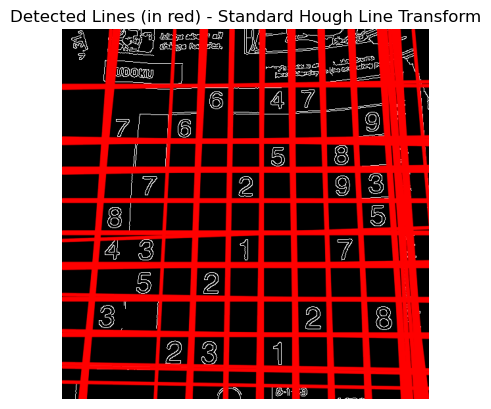

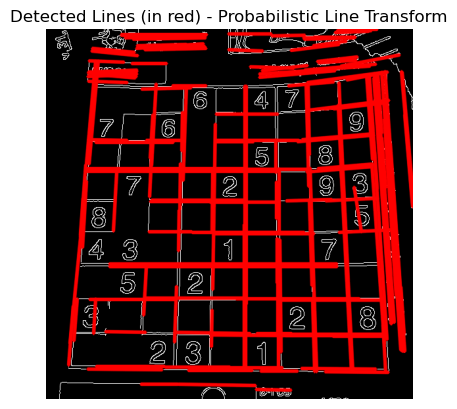

In [2]:
# show the image in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 as cv

def show_image(image, title="Image"):
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the images
show_image(res[0], "Detected Lines (in red) - Standard Hough Line Transform")
show_image(res[1], "Detected Lines (in red) - Probabilistic Line Transform")

plt.show()

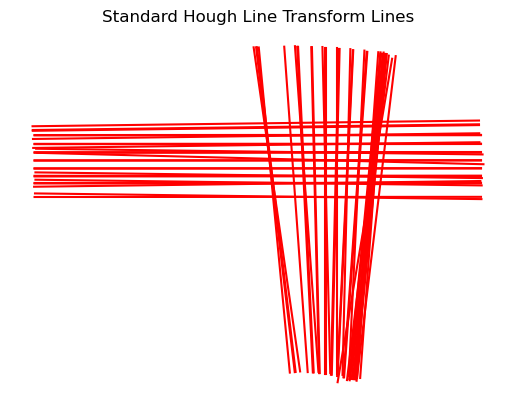

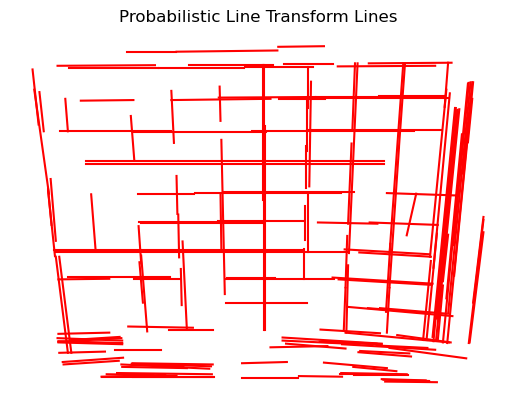

In [3]:
# show the lines

def show_lines(lines, title="Lines", probabilistic=False):
    plt.figure()
    if probabilistic:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            plt.plot([x1, x2], [y1, y2], 'r-')
    else:
        for i in range(len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the lines
show_lines(res[2], "Standard Hough Line Transform Lines")
show_lines(res[3], "Probabilistic Line Transform Lines", probabilistic=True)
